<a href="https://colab.research.google.com/github/gani88/ML-DataScience/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

<h3> This is libraries that I've used to do image classification on handwritten digit/number </h3>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
batch_size=32
epochs=100

# Importing Data

In [4]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Detailing the Data

In [5]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

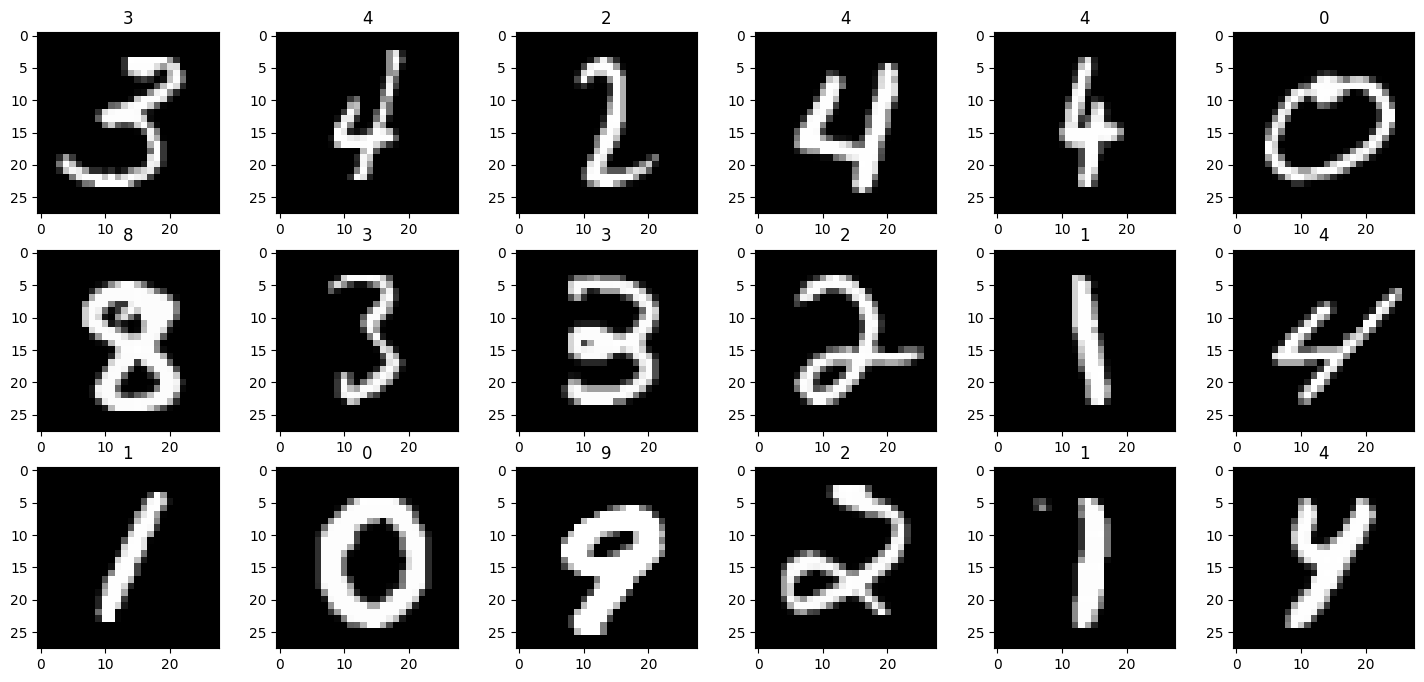

In [8]:
def show_image(train_image, label, index):
  image_shaped = train_image.values.reshape(28, 28)
  plt.subplot(3, 6, index+1)
  plt.imshow(image_shaped, cmap=plt.cm.gray)
  plt.title(label)

plt.figure(figsize=(18, 8))
sample_image = train_data.sample(18).reset_index(drop=True)
for index, row in sample_image.iterrows():
  label = row['label']
  image_pixels = row.drop('label')
  show_image(image_pixels, label, index)


# Prepare the Data

In [9]:
# Split the data for train, validation

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x = train_data.drop(columns=['label']).values.reshape(train_data.shape[0], 28, 28, 1)
y = to_categorical(train_data['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_datagen.fit(x_train)
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen.fit(x_test)
validation_generator = validation_datagen.flow(
    x_test,
    y_test
)

# The Model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile, Callbacks, Training

In [14]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [18]:
model.fit(
    train_generator,
    steps_per_epoch=len(x_train)// batch_size,
    validation_data=validation_generator,
    validation_steps=len(x_test)//batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/100
1181/1181 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9434
Epoch 1: val_loss improved from inf to 0.07899, saving model to model.h5
1181/1181 [==============================] - 24s 20ms/step - loss: 0.1859 - accuracy: 0.9434 - val_loss: 0.0790 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 2/100
1180/1181 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9590
Epoch 2: val_loss improved from 0.07899 to 0.05204, saving model to model.h5
1181/1181 [==============================] - 22s 19ms/step - loss: 0.1353 - accuracy: 0.9590 - val_loss: 0.0520 - val_accuracy: 0.9838 - lr: 0.0010
Epoch 3/100
1181/1181 [==============================] - ETA: 0s - loss: 0.1122 - accuracy: 0.9654
Epoch 3: val_loss improved from 0.05204 to 0.04555, saving model to model.h5
1181/1181 [==============================] - 24s 21ms/step - loss: 0.1122 - accuracy: 0.9654 - val_loss: 0.0456 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 4/100
1178/1181 [=========

# Evaluating the Model & Predict

In [20]:
x_test_rescaled = (x_test.astype('float32') / 255)
scores = model.evaluate(x_test_rescaled, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

accuracy: 99.21%
loss: 3.03%


In [24]:
# Predict

test_digit = test_data.values.reshape(test_data.shape[0], 28, 28, 1).astype('float32') / 255
pred = model.predict(test_digit)
results = np.argmax(pred, axis=1)

875/875 [==============================] - 1s 2ms/step


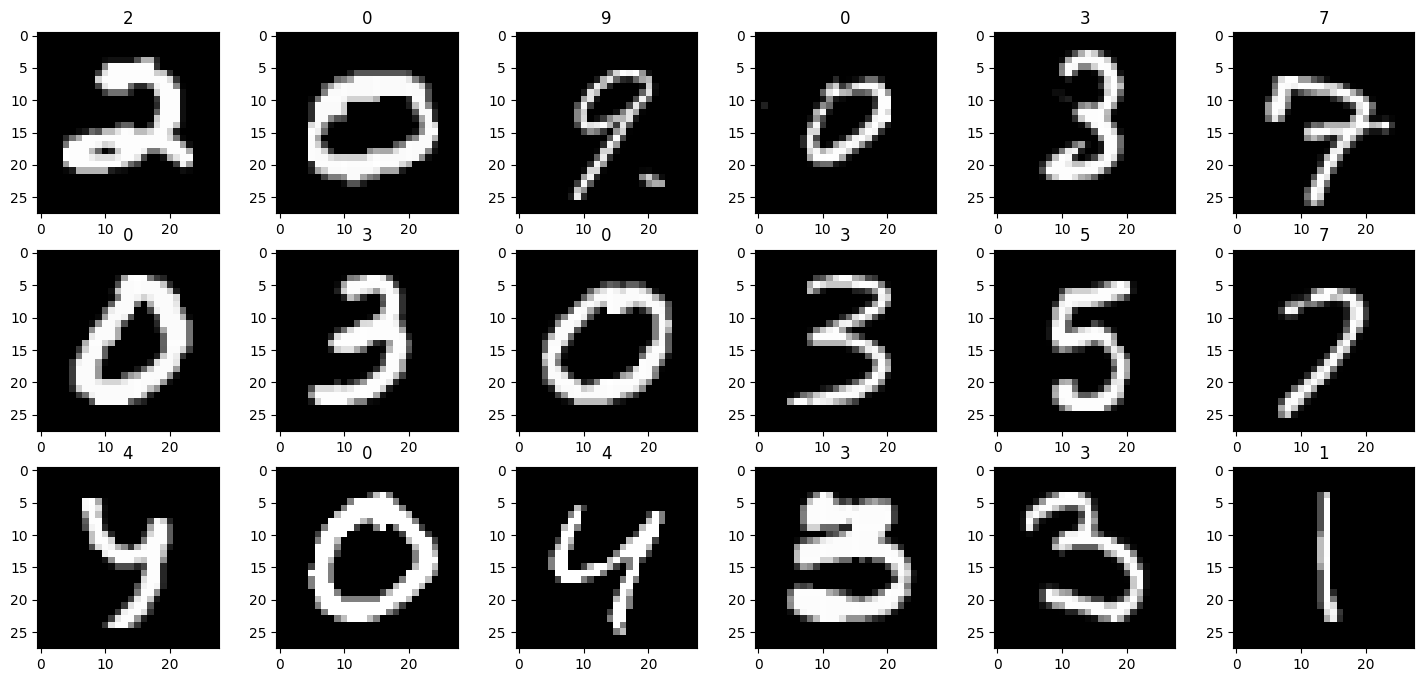

In [26]:
# Show the prediction

plt.figure(figsize=(18, 8))
sample_test = test_data.head(18)
for index, image_pixels in sample_test.iterrows():
  label = results[index]
  show_image(image_pixels, label, index)


# Conclusion

